In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
## starting with the inputs

In [3]:
## enter the values in order(all in SI units): Density, YoungModulus, PoissionRatio, width, Length, depth, nodes, elements, elementallength, availNodes, fixedNode

In [4]:
inputs_list = dict() 
for i in range(11):
    data = input('Enter key & value separated by ":", ') 
    temp = data.split(':') 
    inputs_list[temp[0]] = temp[1] 
print()
# Displaying the dictionary 
for key, value in inputs_list.items(): 
    inputs_list[key] = float(value)
    print(f'Key: {key}, Value: {value}') 
print(inputs_list)

Enter key & value separated by ":", Density:7850
Enter key & value separated by ":", YoungModulus:210
Enter key & value separated by ":", PoissionRatio:0.3
Enter key & value separated by ":", width:0.01
Enter key & value separated by ":", depth:0.01
Enter key & value separated by ":", length:1
Enter key & value separated by ":", elements:50
Enter key & value separated by ":", elementalLength:0.02
Enter key & value separated by ":", nodes:51
Enter key & value separated by ":", availNodes:50
Enter key & value separated by ":", fixedNode:1

Key: Density, Value: 7850
Key: YoungModulus, Value: 210
Key: PoissionRatio, Value: 0.3
Key: width, Value: 0.01
Key: depth, Value: 0.01
Key: length, Value: 1
Key: elements, Value: 50
Key: elementalLength, Value: 0.02
Key: nodes, Value: 51
Key: availNodes, Value: 50
Key: fixedNode, Value: 1
{'Density': 7850.0, 'YoungModulus': 210.0, 'PoissionRatio': 0.3, 'width': 0.01, 'depth': 0.01, 'length': 1.0, 'elements': 50.0, 'elementalLength': 0.02, 'nodes': 51.0

In [5]:
import numpy
elementalLength = inputs_list['length'] / (int(inputs_list['elements']))
nodesPosi = [i * elementalLength  for i in range(int(inputs_list['elements'])+1)]
nodesPosi= numpy.transpose(nodesPosi).reshape(-1,1)

In [6]:
ke=np.array([[12,6*inputs_list['elementalLength'],-12,6*inputs_list['elementalLength']],[6*inputs_list['elementalLength'],4*(inputs_list['elementalLength'])*(inputs_list['elementalLength']),-6*inputs_list['elementalLength'],2*(inputs_list['elementalLength'])*(inputs_list['elementalLength'])],[-12,-6*inputs_list['elementalLength'],12,-6*inputs_list['elementalLength']],[6*inputs_list['elementalLength'],2*(inputs_list['elementalLength'])*(inputs_list['elementalLength']),-6*inputs_list['elementalLength'],4*(inputs_list['elementalLength'])*(inputs_list['elementalLength'])]])

In [7]:
ke

array([[ 1.2e+01,  1.2e-01, -1.2e+01,  1.2e-01],
       [ 1.2e-01,  1.6e-03, -1.2e-01,  8.0e-04],
       [-1.2e+01, -1.2e-01,  1.2e+01, -1.2e-01],
       [ 1.2e-01,  8.0e-04, -1.2e-01,  1.6e-03]])

In [8]:
me = inputs_list['Density'] * 0.0001 * inputs_list['elementalLength'] * np.array([[156, 22 * inputs_list['elementalLength'], 54, -13 * inputs_list['elementalLength']],
                                                                                    [22 * inputs_list['elementalLength'], 4 * inputs_list['elementalLength'] * inputs_list['elementalLength'], 13 * inputs_list['elementalLength'], -3 * inputs_list['elementalLength'] * inputs_list['elementalLength']],
                                                                                    [54, 13 * inputs_list['elementalLength'], 156, -22 * inputs_list['elementalLength']],
                                                                                    [-13 * inputs_list['elementalLength'], -3 * inputs_list['elementalLength'] * inputs_list['elementalLength'], -22 * inputs_list['elementalLength'], 4 * inputs_list['elementalLength'] * inputs_list['elementalLength']]]) / 420


In [9]:
me

array([[ 5.83142857e-03,  1.64476190e-05,  2.01857143e-03,
        -9.71904762e-06],
       [ 1.64476190e-05,  5.98095238e-08,  9.71904762e-06,
        -4.48571429e-08],
       [ 2.01857143e-03,  9.71904762e-06,  5.83142857e-03,
        -1.64476190e-05],
       [-9.71904762e-06, -4.48571429e-08, -1.64476190e-05,
         5.98095238e-08]])

In [10]:
nodesPosi

array([[0.  ],
       [0.02],
       [0.04],
       [0.06],
       [0.08],
       [0.1 ],
       [0.12],
       [0.14],
       [0.16],
       [0.18],
       [0.2 ],
       [0.22],
       [0.24],
       [0.26],
       [0.28],
       [0.3 ],
       [0.32],
       [0.34],
       [0.36],
       [0.38],
       [0.4 ],
       [0.42],
       [0.44],
       [0.46],
       [0.48],
       [0.5 ],
       [0.52],
       [0.54],
       [0.56],
       [0.58],
       [0.6 ],
       [0.62],
       [0.64],
       [0.66],
       [0.68],
       [0.7 ],
       [0.72],
       [0.74],
       [0.76],
       [0.78],
       [0.8 ],
       [0.82],
       [0.84],
       [0.86],
       [0.88],
       [0.9 ],
       [0.92],
       [0.94],
       [0.96],
       [0.98],
       [1.  ]])

In [156]:
np.shape(nodesPosi)

(51, 1)

In [11]:
inputs_list['nodes'] = int(inputs_list['nodes'])

In [12]:
## global stiffness matrix, mass matrix
kg=np.zeros((inputs_list['nodes']*2, inputs_list['nodes']*2))
mg = np.zeros((inputs_list['nodes']*2,inputs_list['nodes']*2))

In [13]:
EI = 175
K = ( EI /(elementalLength*elementalLength*elementalLength) ) * ke
m = me
K1 = np.zeros((inputs_list['nodes']*2, inputs_list['nodes']*2))
m1 = np.zeros((inputs_list['nodes']*2, inputs_list['nodes']*2))
for i in range(1,int(inputs_list['elements'])+1):
    K1[2*i-2:2*i+2,2*i-2:2*i+2]= K
    kg += K1
    K1 = np.zeros((inputs_list['nodes']*2, inputs_list['nodes']*2))
print('Global Stiffness Matrix is:')
print(kg)
for i in range(1,int(inputs_list['elements'])+1):
    m1[2*i-2:2*i+2,2*i-2:2*i+2]= me
    mg += m1
    m1 = np.zeros((inputs_list['nodes']*2, inputs_list['nodes']*2))
print('Global Mass Matrix is:')
print(mg)

Global Stiffness Matrix is:
[[ 2.625e+08  2.625e+06 -2.625e+08 ...  0.000e+00  0.000e+00  0.000e+00]
 [ 2.625e+06  3.500e+04 -2.625e+06 ...  0.000e+00  0.000e+00  0.000e+00]
 [-2.625e+08 -2.625e+06  5.250e+08 ...  0.000e+00  0.000e+00  0.000e+00]
 ...
 [ 0.000e+00  0.000e+00  0.000e+00 ...  7.000e+04 -2.625e+06  1.750e+04]
 [ 0.000e+00  0.000e+00  0.000e+00 ... -2.625e+06  2.625e+08 -2.625e+06]
 [ 0.000e+00  0.000e+00  0.000e+00 ...  1.750e+04 -2.625e+06  3.500e+04]]
Global Mass Matrix is:
[[ 5.83142857e-03  1.64476190e-05  2.01857143e-03 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.64476190e-05  5.98095238e-08  9.71904762e-06 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.01857143e-03  9.71904762e-06  1.16628571e-02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.19619048e-07
   9.71904762e-06 -4.48571429e-08]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  9.71904762e-06
   5.83142

In [14]:
kg = np.delete(kg, [0, 1], axis=0)
kg = np.delete(kg, [0, 1], axis=1)
mg = np.delete(mg, [0, 1], axis=0)
mg = np.delete(mg, [0, 1], axis=1)
kg = np.delete()

In [134]:
np.shape(kg)

(100, 100)

In [143]:
np.shape(V)

(100, 100)

In [39]:
from scipy.linalg import eigh

In [145]:
# GETTING EIGEN VALUES AND EIGEN VECTORS
w, V = eigh(kg, mg)
freq = np.diag(w)
print(len(freq))
for i in range(len(freq)):
    freq[i] = np.sqrt(freq[i]) / (2 * np.pi)

100


In [146]:
w

array([2.75594094e+03, 1.08236691e+05, 8.48593833e+05, 3.25863837e+06,
       8.90475463e+06, 1.98713418e+07, 3.87648383e+07, 6.87135559e+07,
       1.13368430e+08, 1.76904090e+08, 2.64020448e+08, 3.79944922e+08,
       5.30435459e+08, 7.21784487e+08, 9.60824001e+08, 1.25493191e+09,
       1.61203988e+09, 2.04064279e+09, 2.54981004e+09, 3.14919891e+09,
       3.84907004e+09, 4.66030532e+09, 5.59442835e+09, 6.66362750e+09,
       7.88078177e+09, 9.25948950e+09, 1.08141000e+10, 1.25597481e+10,
       1.45123908e+10, 1.66888474e+10, 1.91068399e+10, 2.17850359e+10,
       2.47430894e+10, 2.80016805e+10, 3.15825468e+10, 3.55085053e+10,
       3.98034513e+10, 4.44923235e+10, 4.96010069e+10, 5.51561325e+10,
       6.11846927e+10, 6.77133215e+10, 7.47669399e+10, 8.23661222e+10,
       9.05217132e+10, 9.92230137e+10, 1.08409336e+11, 1.17893579e+11,
       1.27136890e+11, 1.34654908e+11, 1.71119138e+11, 1.81115090e+11,
       1.94525839e+11, 2.10059962e+11, 2.27277099e+11, 2.46050480e+11,
      

In [147]:
np.shape(w)

(100,)

In [148]:
V

array([[-1.57279503e-03, -9.63077384e-03, -2.63968147e-02, ...,
         1.98374269e-01, -1.00001600e-01, -1.19716716e-13],
       [-1.56551167e-01, -9.47225020e-01, -2.56681780e+00, ...,
         1.08406563e+02, -5.45321368e+01, -6.09371897e-11],
       [-6.23291365e-03, -3.72549976e-02, -9.97601283e-02, ...,
         1.97195736e-01, -1.00955806e-01, -1.84067297e-13],
       ...,
       [-3.10719100e+00,  1.07903722e+01, -1.77060417e+01, ...,
         4.74326864e+01,  2.49936700e+01, -3.59674587e+03],
       [-2.25733060e+00,  2.25733084e+00, -2.25733250e+00, ...,
         6.25253072e-01,  3.18007506e-01, -1.93421253e+01],
       [-3.10722795e+00,  1.07917985e+01, -1.77170489e+01, ...,
         2.88830951e+02,  1.47256964e+02, -9.75723275e+03]])

In [149]:
freq

array([[8.35516604e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.23609340e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.46612185e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.96397042e+05, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.97765413e+05, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.55720923e+05]])

In [150]:
np.shape(freq)

(100, 100)

In [153]:
first_five_columns = V[:, :5]

In [154]:
filtered_array = first_five_columns[::2]

In [157]:
filtered_array = np.insert(filtered_array, 0, 0, axis=0)

In [158]:
np.shape(filtered_array)

(51, 5)

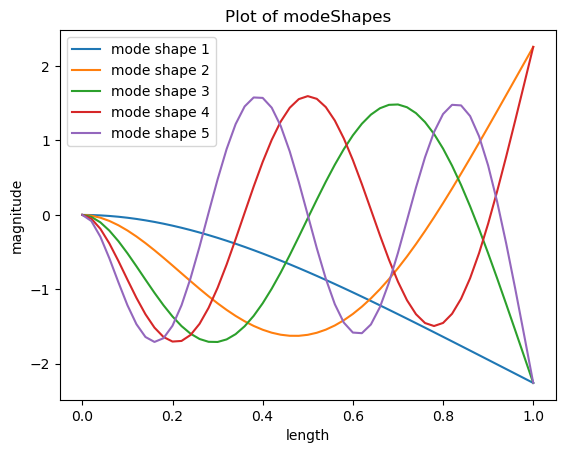

In [161]:
for column in filtered_array.T: 
    plt.plot(nodesPosi, column)
plt.xlabel('length')
plt.ylabel('magnitude')
plt.title('Plot of modeShapes')
plt.legend(['mode shape 1', 'mode shape 2', 'mode shape 3', 'mode shape 4', 'mode shape 5'])  
plt.show()

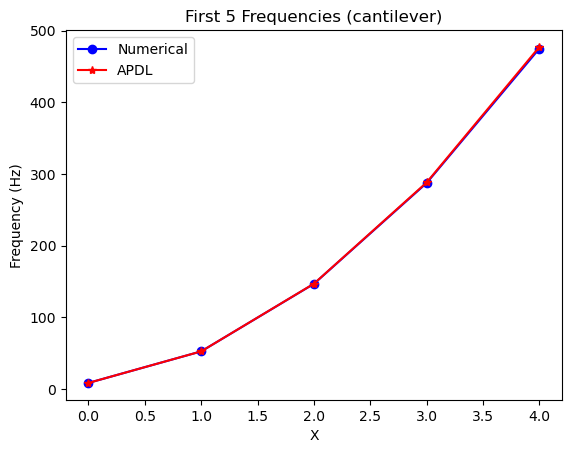

In [164]:
first_five = nat_freq[:5]
APDL = [8.3548, 52.378, 146.80, 288.10, 477.26]
x = np.arange(len(first_five))
#plotting
plt.plot(x, first_five, marker='o', linestyle='-', color='b')
plt.plot(x, APDL, marker='*', linestyle='-', color='r')
plt.xlabel('X')
plt.ylabel('Frequency (Hz)')
plt.title('First 5 Frequencies (cantilever)')
plt.legend(['Numerical', 'APDL'])
plt.show()